In [3]:
import pandas as pd
import os
from IPython.display import display, Latex
from bounos.Analyses.Trust import generate_node_trust_perspective
from bounos.Analyses.Dixon import *
from aietes.Tools import *
import seaborn as sns
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, \
      sklearn.linear_model, sklearn.pipeline, sklearn.metrics
%matplotlib inline
import matplotlib.pyplot as plt
results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"


# Once the above is done, should be able to make averages across target behaviours
def _detick(x):
    if isinstance(x, (float, np.float)):
        return x
    elif x.startswith('\\'  ):
        return True
    else:
        return False

with pd.get_store(os.path.join(results_path, 'w_df.h5')) as s:
    w_df = s.get('weights_381')

with pd.get_store('/dev/shm/top_dt.h5') as s:
    df = pd.concat([s.get(k) for k in s.keys()], keys=[k[1:] for k in s.keys()], names=['Target Behaviour', ''])
df = df.applymap(_detick).groupby(level='Target Behaviour').head(1).groupby(level='Target Behaviour').mean()
_t = df.ix['Mean']
df = df.drop('Mean', axis=0).append(_t)

synth_weights=pd.concat([g.reset_index('subset', drop=True) 
           for my_domain, my_domain_subset in df['Metrics in Synthetic Domain'].iterrows()
           for k,g in w_df.groupby(level='subset')
            if my_domain_subset.equals(k.T)
        ],
         keys = df['Metrics in Synthetic Domain'].index,
         names=['Target', 'Subject'])
synth_weights.rename(columns=invert_dict(metric_rename_dict), inplace=True)

In [151]:
with pd.get_store(results_path + '.h5') as store:
    trust_observations = store.trust.dropna()
    map_levels(trust_observations, var_rename_dict)
    trust_observations
trust_observations.head()
trust = generate_node_trust_perspective(trust_observations)
w_trust = generate_node_trust_perspective(trust_observations, metric_weights=synth_weights.xs(('MPC','MPC')))

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


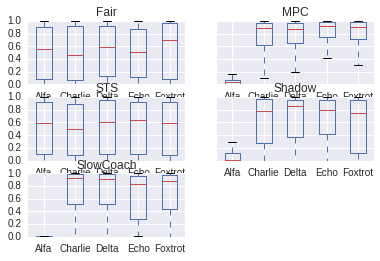

In [5]:
observer = 'Bravo'
w_trust = generate_node_trust_perspective(trust_observations, metric_weights=synth_weights.xs(('Shadow','Shadow')))
_=w_trust.xs(observer, level='observer').drop(observer, axis=1).groupby(level='var').boxplot()

In [4]:
from aietes.Tools import _results_dir
globs = filter(lambda s: s.startswith('Global') and s.endswith('.h5'), os.listdir(_results_dir))
t_acc = None
for g in globs:
    t = pd.get_store(os.path.join(_results_dir,g)).get('trust').dropna()
    if t_acc is None:
        t_acc = t
    else:
        _tinter = t.reset_index()
        _tinter['run']+=t_acc.index.get_level_values('run').max()+1
        t_acc=t_acc.append(_tinter.set_index(t_acc.index.names))
t_acc.shape
trust_observations = t_acc
map_levels(trust_observations, var_rename_dict)



In [5]:
with pd.get_store(os.path.join(results_path, 'w_df.h5')) as s:
    print s.keys()
    w_df = s.get('weights_381')
    w_df_orig = s.get('weights_5')
    w_df_orig.index.rename(['Target', 'Subject'], inplace=True)


with pd.get_store('/dev/shm/top_dt.h5') as s:
    df = pd.concat([s.get(k) for k in s.keys()], keys=[k[1:] for k in s.keys()], names=['Target Behaviour', ''])
df = df.applymap(_detick).groupby(level='Target Behaviour').head(1).groupby(level='Target Behaviour').mean()
_t = df.ix['Mean']
df = df.drop('Mean', axis=0).append(_t)

synth_weights=pd.concat([g.reset_index('subset', drop=True) 
           for my_domain, my_domain_subset in df['Metrics in Synthetic Domain'].iterrows()
           for k,g in w_df.groupby(level='subset')
            if my_domain_subset.equals(k.T)
        ],
         keys = df['Metrics in Synthetic Domain'].index,
         names=['Target', 'Subject'])
synth_weights=w_df_orig.append(synth_weights)
synth_weights.rename(columns=invert_dict(metric_rename_dict), inplace=True)

['/weights', '/weights_381', '/weights_5']


In [6]:
trust_observations[trust_observations.index.get_level_values('run')<10]

ADelay        ARXP       ATXP  \
var       run observer t  target                                      
MPC       0   Alfa     1  Bravo     7.176316   96.326947  91.085576   
                          Charlie   5.903612  100.939256  91.085576   
                          Delta     6.246877   94.153780  91.085576   
                          Echo      1.517279   95.446779  91.085576   
                          Foxtrot  13.773787   96.843761  91.085576   
                       2  Bravo    33.948621   98.728902  91.085576   
                          Charlie   6.519292   95.824753  91.085576   
                          Delta    10.265950   95.028360  91.085576   
                          Echo      2.623489   96.437457  91.085576   
                          Foxtrot   4.973983   95.684561  91.085576   
                       3  Bravo    24.321294   97.116530  91.085576   
                          Charlie  24.106677   97.240242  91.085576   
                          Delta     6.212667   97.736078  91.085576   
                          Echo      9.518977   96.010819  91.085576   
                          Foxtrot   9.988706   97.392072  91.085576   
                       4  Bravo     7.072577   96.796088  91.085576   
                          Charlie   0.829242   93.769506  91.085576   
                          Delta    19.531507   97.498453  91.085576   
                          Echo      5.373254   95.681994  91.085576   
                          Foxtrot  14.275887   95.261128  91.085576   
                       5  Bravo     6.820754   95.747624  91.085576   
                          Charlie  43.668658   94.081644  91.085576   
                          Delta    26.568699   94.444171  91.085576   
                          Echo     31.996476   95.021256  91.085576   
                          Foxtrot   2.954361   95.498569  91.085576   
                       6  Bravo     4.677162   96.047194  91.085576   
                          Charlie   7.596664   96.705037  91.085576   
                          Delta     2.375206   95.237521  91.085576   
                          Echo     18.646086   96.048780  91.085576   
                          Foxtrot  19.489239   96.555310  91.085576   
...                                      ...         ...        ...   
SlowCoach 9   Foxtrot  6  Alfa     24.325402   99.669075  91.085576   
                          Bravo    18.228085   98.507173  91.085576   
                          Charlie   1.148054   96.575943  91.085576   
                          Delta    11.719147   96.286250  91.085576   
                          Echo     10.489963   97.123567  91.085576   
                       7  Alfa     21.145361   99.107382  91.085576   
                          Bravo    20.119954   97.256757  91.085576   
                          Charlie   0.806748   98.596852  91.085576   
                          Delta    20.428997  100.246425  91.085576   
                          Echo     11.120494   97.777046  91.085576   
                       8  Alfa     10.083420   96.940430  91.085576   
                          Bravo     0.626068   95.017627  91.085576   
                          Charlie   5.222712   95.017621  91.085576   
                          Delta    24.475190   93.378692  91.085576   
                          Echo      4.383799   94.685756  91.085576   
                       9  Alfa      6.457509   97.046623  91.085576   
                          Bravo    12.955152   95.084698  91.085576   
                          Charlie  29.642455   94.768705  91.085576   
                          Delta    22.496905   95.158329  91.085576   
                          Echo     20.745136   94.574646  91.085576   
                       10 Alfa      8.591328   97.788978  91.085576   
                          Bravo     8.962114   97.869650  91.085576   
                          Charlie  16.590468   98.514565  91.085576   
                          Delta    33.033802   97.395853  91.0

In [7]:

w_trust_m = {}
for (dom,var), v in synth_weights.iterrows():
    w_trust_m[(dom,var)] = generate_node_trust_perspective(trust_observations[trust_observations.index.get_level_values('run')<100], 
                                                   metric_weights=v)

NameError: name 'w_trust_df' is not defined

In [9]:
w_trust_df = pd.concat(w_trust_m.values(), keys=w_trust_m.keys(), names=['target_domain', 'target_var','var', 'run', 'observer','t'])
w_trust_df.columns.names = w_trust_df.columns.names[:-1]+['node']
w_trust_df=w_trust_df.stack('node').reset_index()
w_trust_df.columns = w_trust_df.columns[:-1].tolist()+['trust']
w_trust_df.groupby('target_domain').mean()

,run,t,trust
target_domain,,,
Comms,49.490213,6.000662,0.524158
Comms alt.,49.490213,6.000662,0.443394
Full,49.490213,6.000662,0.569589
MPC,49.490213,6.000662,0.531382
Mean,49.490213,6.000662,0.510596
Phys,49.490213,6.000662,0.507336
Phys alt.,49.490213,6.000662,0.531155
STS,49.490213,6.000662,0.481153
Shadow,49.490213,6.000662,0.534132


In [10]:
w_pt = pd.pivot_table(w_trust_df, index=['var', 'run', 'observer','node','t'], 
                      columns=['target_domain', 'target_var'], values='trust')
display(w_pt.head())
%matplotlib inline
def _ewma(gf):
    return gf.ewm(alpha=0.5).mean()
plt.rcParams['figure.figsize'] = (12,10)
w_pt=w_pt.groupby(level=['var','run','observer']).apply(_ewma)
_=w_pt.drop('Alfa', level='observer').groupby(level=['var','node'])

target_domain                 Comms                               Comms alt.  \
target_var                      MPC       STS    Shadow SlowCoach        MPC   
var  run observer node  t                                                      
Fair 0   Alfa     Bravo 1  0.411971  0.063693  0.997563  0.997768   0.399662   
                        2  0.530941  0.073870  0.227573  0.815481   0.564538   
                        3  0.650003  0.941724  0.678674  0.611585   0.565150   
                        4  0.415423  0.975368  0.029220  0.017077   0.323872   
                        5  0.408364  0.447267  0.454681  0.708076   0.282853   

target_domain                                                Full            \
target_var                      STS    Shadow SlowCoach       MPC       STS   
var  run observer node  t                                                     
Fair 0   Alfa     Bravo 1  0.012614  0.071295  0.039769  0.718326  0.988645   
                        2  0.297904  0.918542  0.790305  0.334233  0.912135   
                        3  0.533500  0.099114  0.179769  0.676630  0.124215   
                        4  0.427678  0.018313  0.057755  0.251223  0.016548   
                        5  0.826237  0.933188  0.930789  0.421680  0.305430   

target_domain                ...          STS              Shadow            \
target_var                   ...       Shadow SlowCoach       MPC       STS   
var  run observer node  t    ...                                              
Fair 0   Alfa     Bravo 1    ...     0.415748  0.411040  0.946608  0.702492   
                        2    ...     0.993480  0.994440  0.409445  0.905941   
                        3    ...     0.090002  0.064644  0.796569  0.235956   
                        4    ...     0.136074  0.074157  0.003179  0.000535   
                        5    ...     0.662614  0.717302  0.710677  0.736260   

target_domain                                 SlowCoach                      \
target_var                   Shadow SlowCoach       MPC       STS    Shadow   
var  run observer node  t                                                     
Fair 0   Alfa     Bravo 1  0.971152  0.974894  0.933746  0.929499  0.983036   
                        2  0.194285  0.045999  0.006875  0.002918  0.047376   
                        3  0.947357  0.908132  0.916702  0.675759  0.957353   
                        4  0.003400  0.057824  0.012748  0.007555  0.166769   
                        5  0.898176  0.707683  0.652035  0.373479  0.549465   

target_domain                        
target_var                SlowCoach  
var  run observer node  t            
Fair 0   Alfa     Bravo 1  0.998905  
                        2  0.000366  
                        3  0.737104  
                        4  0.092537  
                        5  0.048825  

[5 rows x 40 columns]

In [12]:
def group_dixon_test(g,gf):
    acc = []
    for k,v in gf.T.apply(dixon_test_90, axis=1).T.iteritems():
        outlier = map(lambda x:x[-1],gf.loc[gf[k]==v].index.tolist())
        if outlier:
            acc.append((g[0],g[1],k,outlier[0]))
        else:
            acc.append((g[0],g[1],k,'None'))

        if len(outlier)>1:
            raise ValueError("Haven't written the case for multiple outliers yet")
    return pd.DataFrame(acc, columns=['var','run','metric','target'])

sf = pd.concat(
    [group_dixon_test(g,gf)
          for g,gf in w_pt.groupby(level=['var','run','node']).sum().groupby(level=['var','run'])
    ]
)
culprit='Alfa'
sf['++']=(sf['target'] == culprit) != ((sf['var'] == "Fair") & (sf['target'] == 'None'))
sf['-+']=(sf['target'] != 'None')  & ((sf['var'] == "Fair") | (sf['target'] != culprit))

sf.groupby(['var','metric'])['++'].mean()


var        metric                 
Fair       (Comms, MPC)               0.88
           (Comms, STS)               0.96
           (Comms, Shadow)            0.94
           (Comms, SlowCoach)         0.94
           (Comms alt., MPC)          0.92
           (Comms alt., STS)          0.95
           (Comms alt., Shadow)       0.88
           (Comms alt., SlowCoach)    0.89
           (Full, MPC)                0.90
           (Full, STS)                0.86
           (Full, Shadow)             0.92
           (Full, SlowCoach)          0.91
           (MPC, MPC)                 0.86
           (MPC, STS)                 0.92
           (MPC, Shadow)              0.90
           (MPC, SlowCoach)           0.96
           (Mean, MPC)                0.90
           (Mean, STS)                0.93
           (Mean, Shadow)             0.92
           (Mean, SlowCoach)          0.91
           (Phys, MPC)                0.90
           (Phys, STS)                0.93
           (Phys, S

In [13]:
sf[['target_domain','target_var']] = sf.metric.apply(pd.Series)
_sf=sf.reset_index().groupby(['target_domain','target_var', 'var'])[['++','-+']].mean().copy().reset_index()
#_sf=_sf.unstack('var')
_perf=_sf[_sf['var']==_sf.target_var].set_index(['target_domain', 'target_var'])\
    .drop('var', axis=1).unstack('target_var').sortlevel(axis=1)\
    .T[synth_weights.index.get_level_values('Target').unique()].T

In [14]:
Latex(_perf.to_latex())

<IPython.core.display.Latex object>

In [56]:
_sel=_sf[_sf['var']=='Fair'].set_index(['target_domain', 'target_var'])\
    .drop('var', axis=1).unstack('target_var').sortlevel(axis=1)\
    .T[synth_weights.index.get_level_values('Target').unique()].T
Latex(_sel.to_latex())
fig_path = "/home/bolster/src/thesis/Figures/"

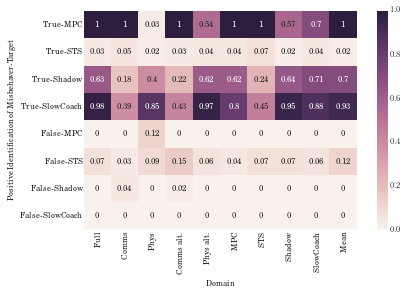

In [65]:
_=_perf.stack()
_.columns=['True','False']
_.columns.name='Positive Identification of Misbehaver'
_.index.rename(['Domain','Target'], inplace=True)
_perf=_.unstack()
import bounos.ChartBuilders as cb
fs = cb.latexify(columns=cb._texcol,factor=cb._texfac)
f,ax = plt.subplots(1,1, figsize=fs)
sns.heatmap(_perf.T, square=True, annot=True, ax=ax)
#ax=cb.format_axes(ax, tight=False)
f.tight_layout()
f.savefig("{}/{}.{}".format(fig_path, 'positive_heat', 'pdf'), tight=True)

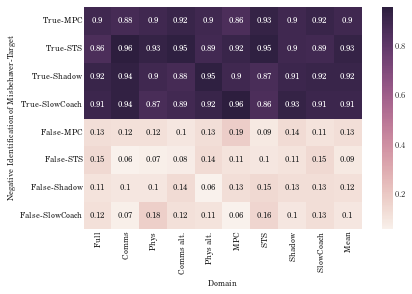

In [66]:
_=_sel.stack()
_.columns=['True','False']
_.columns.name='Negative Identification of Misbehaver'
_.index.rename(['Domain','Target'], inplace=True)
_sel=_.unstack()
fs = cb.latexify(columns=cb._texcol,factor=cb._texfac)
f,ax = plt.subplots(1,1, figsize=fs)
sns.heatmap(_sel.T, square=True, annot=True, ax=ax)
#ax=cb.format_axes(ax, tight=False)
f.tight_layout()
f.savefig("{}/{}.{}".format(fig_path, 'negative_heat', 'pdf'), tight=True)

In [520]:
Latex(sf[sf['var']==sf['metric']].groupby(['metric'])[['++','-+']].mean().reset_index().to_latex(index=False, float_format=lambda f: "{0:1.3f}".format(f))
)

<IPython.core.display.Latex object>

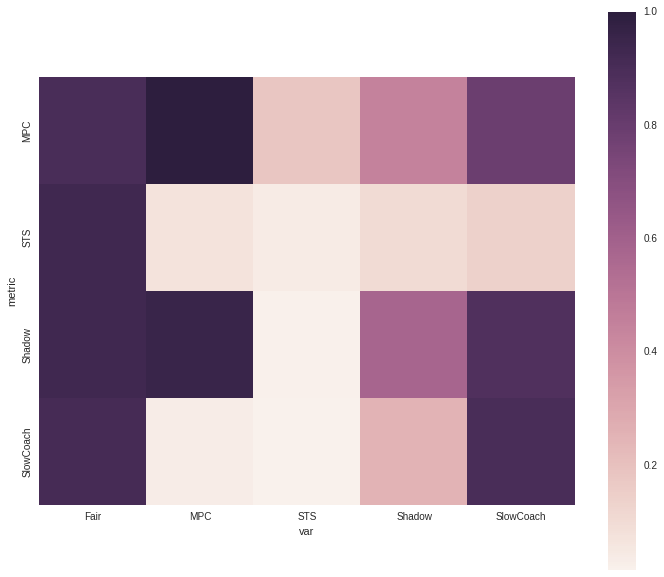

In [471]:
sns.heatmap(sf.groupby(['var','metric'])['++'].mean().unstack('var'), square=True)

In [461]:
sf[sf['var']=='STS'].groupby(['run','metric'])['++'].mean().groupby(level=['run']).mean()

0.065664556962025319

In [478]:
_intergf

node                              Alfa      Bravo    Charlie      Delta  \
var       run target_domain                                               
SlowCoach 315 MPC            25.045861  27.743755  28.391348  27.661962   
              STS            20.513519  23.040045  24.551122  21.966449   
              Shadow          2.797572  33.280296  45.776667  31.205245   
              SlowCoach       0.090741  41.506380  42.972045  42.206307   

node                              Echo    Foxtrot  
var       run target_domain                        
SlowCoach 315 MPC            27.825487  28.450235  
              STS            24.014050  25.611646  
              Shadow         32.841796  43.031855  
              SlowCoach      43.838574  50.638890

'Alfa'

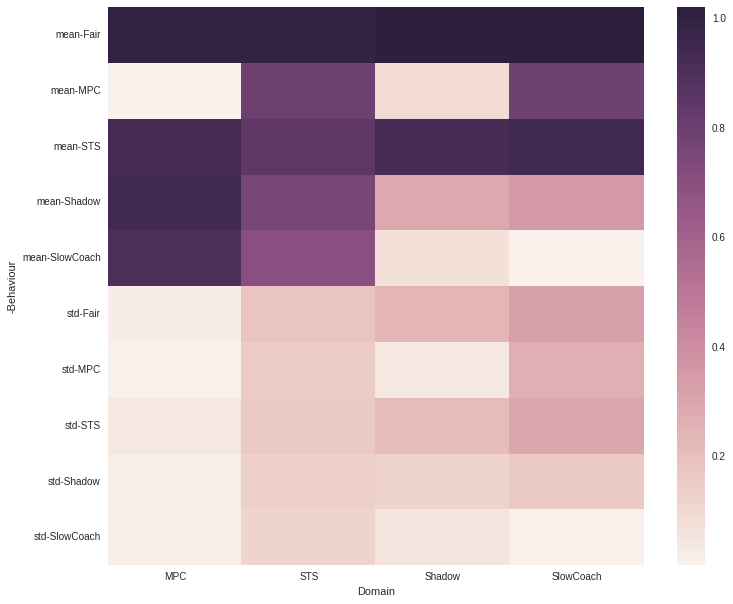

In [476]:
display(culprit)
intergfs = []
for g, gf in w_pt.groupby(level=['var','run','node']).sum().groupby(level=['var','run']):
    _intergf = gf.unstack('node').stack('target_domain')
    intergfs.append(_intergf[culprit] / _intergf.drop(culprit, axis=1).mean(axis=1))

confidences = pd.concat(intergfs).unstack('target_domain')
c_table = confidences.groupby(level='var').describe().unstack('var').iloc[[1, 2]].stack('var')
c_table.columns.name = 'Domain'
c_table.index.names = ['', 'Behaviour']
sns.heatmap(c_table)

In [416]:
confidences = {}
outliers = {}
for g, gf in w_pt.groupby(level=['var','run','node']).sum().groupby(level=['var','run']):
    # Find ANY qtest activations
    qtest = gf.T.apply(dixon_test_90, axis=1)
    n_outliers = len(filter(lambda l: l != [None], qtest))
    if n_outliers:
        _intergf = gf.unstack('node').stack('target_domain')
        # Find the outlier
        _outliers = filter(lambda l: l != [],
                          [map(lambda x: x[-1],
                               gf.loc[gf[k] == v].index.tolist())
                           for k, v in qtest.T.iteritems()]
                          )
        outlier_s = set([i[0] for i in _outliers])
        if len(outlier_s) > 1:
            print "Sneaky Contradictions!{}, assuming Alfa".format(outlier_s)
            for outlier in outlier_s:
                display(outlier,(_intergf[outlier] / _intergf.drop(outlier, axis=1).mean(axis=1)).unstack('target_domain'))
        else:
            outlier = outlier_s.pop()

        # Apply this to groups of var/run of summed_sigma
 
        confidences[g] = (_intergf[outlier] / _intergf.drop(outlier, axis=1).mean(axis=1)).unstack('target_domain')
        if 
#display(pd.concat(confidences.values()).sort_index())

Sneaky Contradictions!set(['Charlie', 'Alfa']), assuming Alfa


'Charlie'

,target_domain,MPC,STS,Shadow,SlowCoach
var,run,,,,
STS,1,1.004811,0.891091,0.82535,0.820384


'Alfa'

,target_domain,MPC,STS,Shadow,SlowCoach
var,run,,,,
STS,1,0.918358,0.912606,1.032612,0.919171


In [417]:
display(pd.concat(confidences.values()).sort_index())

target_domain       MPC       STS    Shadow  SlowCoach
var       run                                         
Fair      1    0.980525  1.049415  0.766296   1.136338
MPC       0    0.005458  0.672585  0.076126   0.907237
          1    0.003846  0.822387  0.081134   0.639702
          2    0.000131  0.748473  0.088534   0.878932
STS       0    0.907907  0.797408  0.923696   0.860896
          1    0.918358  0.912606  1.032612   0.919171
          2    0.897549  0.628935  0.846866   1.154362
Shadow    1    0.945971  0.751316  0.320824   0.624761
          2    0.940335  0.772983  0.218105   0.555405
SlowCoach 0    0.908688  0.678698  0.063747   0.035016
          1    0.909152  0.665442  0.058439   0.012066
          2    0.903969  0.656341  0.061365   0.011495

In [264]:
def _diag_true_positive(w_pt, var, culprit='Alfa', confidence=0.1):
    x = w_pt.xs(var, level='var').drop(culprit, level='observer').stack('target_domain')\
    .groupby(level=['run','observer', 'target_domain']).apply(_classifier)
    x=pd.DataFrame(x.values.tolist(), index=x.index, columns=['suspect','confidence'])
    
    if var != 'Fair':
        tp = ((x.suspect==cuplrit) & (x.confidence>confidence)).groupby(level='target_domain').mean()
        fp = ((x.suspect!=cuplrit) & (x.confidence>confidence)).groupby(level='target_domain').mean()
    else:
        tp =((x.confidence>confidence)).groupby(level='target_domain').mean()
        fp =((x.confidence<confidence)).groupby(level='target_domain').mean()
    return tp,fp
tp = {}
fp = {}
culprit='Alfa'
for m in w_pt.index.get_level_values('var').unique():
    tp[m], fp[m] = _diag_true_positive(w_pt, m)


In [265]:
tpf = pd.DataFrame(tp)
tpf.columns.name='True Behaviour'
tpf

True Behaviour,Fair,MPC,STS,Shadow,SlowCoach
target_domain,,,,,
MPC,0.200000,1.000000,0.066667,0.866667,1.000000
STS,0.200000,0.266667,0.200000,0.000000,0.066667
Shadow,0.333333,1.000000,0.066667,1.000000,1.000000
SlowCoach,0.000000,0.466667,0.000000,0.000000,1.000000


In [267]:
fpf = pd.DataFrame(fp)
fpf.columns.name='False Behaviour'
fpf

False Behaviour,Fair,MPC,STS,Shadow,SlowCoach
target_domain,,,,,
MPC,0.800000,0.000000,0.733333,0.133333,0.000000
STS,0.800000,0.600000,0.733333,0.933333,0.733333
Shadow,0.666667,0.000000,0.733333,0.000000,0.000000
SlowCoach,1.000000,0.533333,0.933333,0.800000,0.000000


In [183]:
Latex(pd.DataFrame.from_dict({'++':tp,'-+':fp}).to_latex())

<IPython.core.display.Latex object>

In [49]:

for k,gf in w_pt.xs('MPC', level='var').drop('Alfa', level='observer').stack('target_domain').groupby(level=['run','observer', 'target_domain']):
    gf=gf.unstack('node')
    break
qtest=gf.apply(dixon_test_90, axis=1).T

x=pd.concat([
    pd.concat(
    [(gf[gf.index.to_series()==i]==v).idxmax(axis=1)
        for i,v in qtest.T.dropna()[c].iteritems()])
 for c in qtest.T.dropna()], keys=qtest.T.dropna().keys()).reset_index()
x.columns=['node', 'run','observer','t','target_domain','suspect']
suspect = x.suspect.describe()['top']
conf = (x.suspect.value_counts()/x.suspect.count())[suspect]
x

,node,run,observer,t,target_domain,suspect
0,Alfa,0,Bravo,2,MPC,Alfa
1,Alfa,0,Bravo,3,MPC,Alfa
2,Alfa,0,Bravo,4,MPC,Alfa
3,Alfa,0,Bravo,6,MPC,Alfa
4,Alfa,0,Bravo,7,MPC,Alfa
5,Alfa,0,Bravo,8,MPC,Alfa
6,Alfa,0,Bravo,9,MPC,Alfa
7,Alfa,0,Bravo,10,MPC,Alfa
8,Alfa,0,Bravo,11,MPC,Alfa
9,Alfa,0,Bravo,12,MPC,Alfa


In [48]:
tp

{'MPC': 0.96949152542372885,
 'STS': 0.0079096045197740109,
 'Shadow': 0.091525423728813546,
 'SlowCoach': 0.3254237288135593}

In [ ]:
data = w_trust.xs(observer, level='observer').drop(observer, axis=1).xs('Shadow', level='var')
data.columns.name='target node'
#data.subtract(data.mean(axis=1), axis=1)
run_data= data.unstack('run').ewm(alpha=0.2).mean().stack('run')

In [ ]:
run_data

In [ ]:
w_trust.xs(observer, level='observer').drop(observer, axis=1).groupby(level=['var', 'run']).count()

In [ ]:
metric_weights = synth_weights.xs(('MPC','MPC'))

In [ ]:
metric_weights.where(metric_weights < 0).dropna()